In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar10-with-cnn-for-beginer/__results__.html
/kaggle/input/cifar10-with-cnn-for-beginer/__resultx__.html
/kaggle/input/cifar10-with-cnn-for-beginer/__notebook__.ipynb
/kaggle/input/cifar10-with-cnn-for-beginer/__output__.json
/kaggle/input/cifar10-with-cnn-for-beginer/custom.css
/kaggle/input/cifar10-with-cnn-for-beginer/saved_models/keras_cifar10_trained_model.h5
/kaggle/input/cifar10-with-cnn-for-beginer/__results___files/__results___18_1.png
/kaggle/input/cifar10-with-cnn-for-beginer/__results___files/__results___9_0.png
/kaggle/input/cifar10-with-cnn-for-beginer/__results___files/__results___31_0.png
/kaggle/input/cifar10-with-cnn-for-beginer/__results___files/__results___27_0.png
/kaggle/input/cifar10-with-cnn-for-beginer/__results___files/__results___29_0.png
/kaggle/input/cifar10-with-cnn-for-beginer/__results___files/__results___23_0.png
/kaggle/input/cifar10-with-cnn-for-beginer/__results___files/__results___34_0.png


# CIFAR 10 dataset for image classification

In [11]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

Load the dataset

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [4]:
print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [5]:
# Convert 2D array to 1D
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [6]:
# Define the classes
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
# Function to plot the images with class names
def plot_image(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

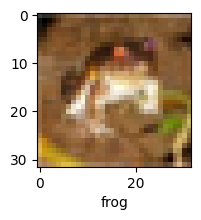

In [8]:
plot_image(X_train, y_train, 0)

Preprocess the data

In [25]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [33]:
# This is the final layer achieved which provides a good balance of metrics between train and val set. 
#The previous iterations had lesser layers and dropouts, on increaseing convolutional layers and dropouts, accuracy metrics took a hit
# But the model is not overfitting anymore

model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.30))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.30))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.30))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

Model building

In [34]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 16, 16, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,29

 Total params: 712,586 (2.72 MB)

 Trainable params: 711,306 (2.71 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [30]:
# Implement early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Did not implement early stopping because model took some time to get generalized with data to get improved result. Can be used in case of overfitting.

In [35]:
# Data augmentation for better model generalization
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

cnn = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
             )


Epoch 1/50
  10/1562 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.1465 - loss: 3.8374 - precision: 0.1380 - recall: 0.0743 

W0000 00:00:1711313437.755063      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1558/1562 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3059 - loss: 1.9581 - precision: 0.4777 - recall: 0.0919

W0000 00:00:1711313480.570869      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 57s 28ms/step - accuracy: 0.3061 - loss: 1.9573 - precision: 0.4780 - recall: 0.0920 - val_accuracy: 0.4514 - val_loss: 1.5144 - val_precision: 0.6102 - val_recall: 0.2896
Epoch 2/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 522us/step - accuracy: 0.4375 - loss: 1.6131 - precision: 0.8571 - recall: 0.1875 - val_accuracy: 0.4561 - val_loss: 1.4931 - val_precision: 0.6194 - val_recall: 0.2899
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4668 - loss: 1.4603 - precision: 0.6598 - recall: 0.2654 - val_accuracy: 0.5844 - val_loss: 1.1588 - val_precision: 0.7490 - val_recall: 0.4295
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.5938 - loss: 1.0424 - precision: 0.8333 - recall: 0.4688 - val_accuracy: 0.5831 - val_loss: 1.1667 - val_precision: 0.7493 - val_recall: 0.4297
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5435 - loss: 1.2877 - precision: 0.7132 - recall: 0.3687 - val_accuracy: 0.5480 - val

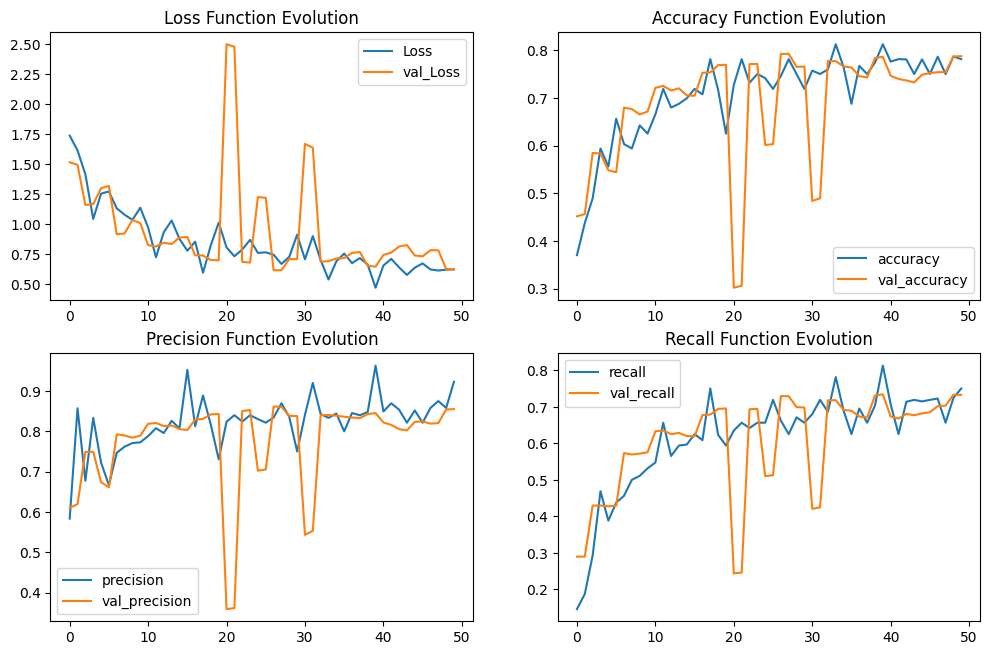

In [37]:
# It can be seen that the metrics are steady after epoch 30. 
# The training was started with 20 epoch but later increased to 50 to let model train more.

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(cnn.history['loss'], label='Loss')
plt.plot(cnn.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(cnn.history['accuracy'], label='accuracy')
plt.plot(cnn.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(cnn.history['precision'], label='precision')
plt.plot(cnn.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(cnn.history['recall'], label='recall')
plt.plot(cnn.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7916 - loss: 0.6192 - precision: 0.8586 - recall: 0.7387
Test Accuracy : 78.76%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


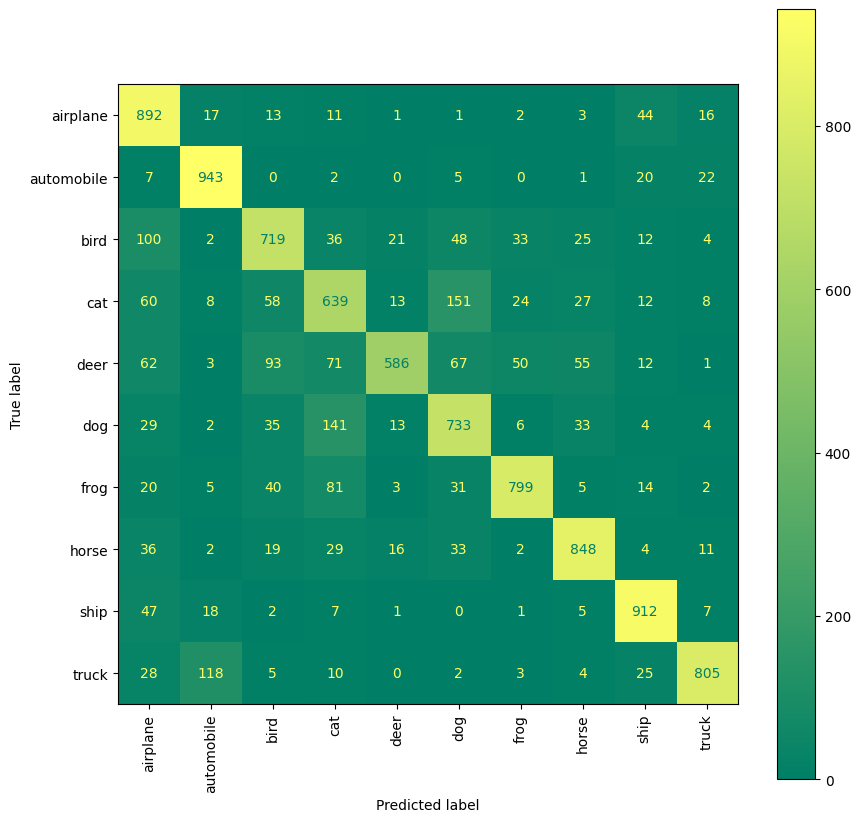

In [39]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
# It can be seen that model is less accurate about cat/dog, bird/aeroplane and automobile/truck
# This could be due to the similarity in features: wings of birds and aeroplanes, cats and dogs being small and 4 footed, etc.
# To further improve the misclassifications, increase layers and make model complex to further extract more features from the images.
# Explore with further hyperparameter tuning like increasing dropout.
# Further augmentation techniques like zooming, and rotation.
